In [84]:
# This handy piece of code changes Jupyter Notebooks margins to fit your screen.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Be sure you've installed the praw and tqdm libraries. If you haven't you can run the line below.  Node.js in required to install the jupyter widgets in a few cells.  These two cells can take a while to run and won't show progress; you can also run the commands in the command prompt (without the !) to see the progress as it installs.

If conda is taking a long time, you might try the mamba installer: https://github.com/TheSnakePit/mamba
`conda install -c conda-forge mamba -y`
Then installing packages with mamba should be done from the command line (console or terminal).

In [85]:
!conda install tqdm praw nodejs -y

Solving environment: ...working... done




InvalidArchiveError('Error with archive C:\\Users\\cavot\\anaconda3\\pkgs\\openssl-1.1.1g-he774522_0cyhb8gqw\\pkg-openssl-1.1.1g-he774522_0.tar.zst.  You probably need to delete and re-download or re-create this file.  Message from libarchive was:\n\nCould not unlink')



## Package Plan ##

  environment location: C:\Users\cavot\anaconda3

  added / updated specs:
    - nodejs
    - praw
    - tqdm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       he774522_0         4.8 MB
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following NEW packages will be INSTALLED:

  nodejs             pkgs/main/win-64::nodejs-10.13.0-0

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.4-py38h32f6830~ --> pkgs/main::conda-4.8.4-py38_0
  openssl                                       conda-forge --> pkgs/main




openssl-1.1.1g       | 4.8 MB    |            |   0% 
openssl-1.1.1g       | 4.8 MB    |            |   0% 
openssl-1.1.1g       | 4.8 MB    | #9         |  20% 
openssl-1.1.1g   

In [86]:
conda install -c conda-forge praw


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
conda install mamba -c conda-forge

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda





## Package Plan ##

  environment location: C:\Users\cavot\anaconda3

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |   py38h32f6830_2         3.1 MB  conda-forge
    libsolv-0.7.14             |       h7bd577a_5         401 KB  conda-forge
    mamba-0.1.2                |   py38h6fe49af_0         288 KB  conda-forge
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.5 MB

The following NEW packages will be INSTALLED:

  libsolv            conda-forge/win-64::libsolv-0.7.14-h7bd577a_5
  mamba              conda-forge/win-64::mamba-0.1.2-py38h6fe49af_0
  python_abi         conda-forge/win-64::py

Install the jupyter widget to enable tqdm to work with jupyter lab:

In [87]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  C:\Users\cavot\AppData\Local\Temp\jupyterlab-debug-dngajrbl.log


# Scrape Reddit Comments for a Sentiment Analysis - Assignment
### Go through the notebook and complete the code where prompted
##### This assignment was adapted from a number of sources including: http://www.storybench.org/how-to-scrape-reddit-with-python/ and https://towardsdatascience.com/scraping-reddit-data-1c0af3040768

In [88]:
# Import all the necessary libraries
import praw # Import the Praw library: https://praw.readthedocs.io/en/latest/code_overview/reddit_instance.html
import pandas as pd # Import Pandas library: https://pandas.pydata.org/
import datetime as dt # Import datetime library
import matplotlib.pyplot as plt # Import Matplot lib for plotting
import numpy as np
from tqdm.notebook import tqdm  # progress bar used in loops

import credentials as cred  # make sure to enter your API credentials in the credentials.py file

# Prompt
### In the cell below, enter your client ID, client secret, user agent, username, and password in the appropitate place withing the quotation marks

In [89]:
# Praw (Python Reddit API Wrapper) is used to communicate with Reddit
reddit = praw.Reddit(client_id='9avrfKiz83ABuA',
                     client_secret='HsEdba-izc7J5ojupbn7qP_s5tQ',
                     user_agent='MSDS600')

# Prompt
## In the cell below, enter a subreddit you which to compare the sentiment of the post comments, decide how far back to pull posts, and how many posts to pull comments from.
## We will be comparing two subreddits, so think of a subject where a comparison might be interesting (e.g. if there are two sides to an issue which may show up in the sentiment analysis as positive and negative scores).

In [90]:
number_of_posts = 100
time_period = 'All'  # use posts from all time

# .top() can use the time_period argument
# subreddit = reddit.subreddit('').top(time_filter=time_period, limit=number_of_posts)

subreddit = reddit.subreddit('nvidia').hot(limit=number_of_posts)

# Create an empty list to store the data
subreddit_comments = []

# go through each post in our subreddit and put the comment body and id in our dictionary
# the value for 'total' here needs to match 'limit' in reddit.subreddit().top()
for post in tqdm(subreddit, total=number_of_posts):
    submission = reddit.submission(id=post)
    submission.comments.replace_more(limit=0)  # This line of code expands the comments if “load more comments” and “continue this thread” links are encountered
    for top_level_comment in submission.comments: 
        subreddit_comments.append(top_level_comment.body)  # add the comment to our list of comments

In [91]:
number_of_posts = 100
time_period = 'All'  # use posts from all time

# .top() can use the time_period argument
# subreddit = reddit.subreddit('').top(time_filter=time_period, limit=number_of_posts)

subreddit2 = reddit.subreddit('Amd').hot(limit=number_of_posts)

# Create an empty list to store the data
subreddit_comments2 = []

# go through each post in our subreddit and put the comment body and id in our dictionary
# the value for 'total' here needs to match 'limit' in reddit.subreddit().top()
for post in tqdm(subreddit2, total=number_of_posts):
    submission2 = reddit.submission(id=post)
    submission2.comments.replace_more(limit=0)  # This line of code expands the comments if “load more comments” and “continue this thread” links are encountered
    for top_level_comment2 in submission2.comments: 
        subreddit_comments2.append(top_level_comment2.body)  # add the comment to our list of comments

In [92]:
# View the comments.
subreddit_comments2

["**Summary of Issue:**  \n- Random BSOD daily.  The computer hangs like it's thinking real hard.  No response from mouse or keyboard.  Just sits for a few seconds then goes to BSOD.  Same error every time:  VIDEO_TDR_FAILURE of amdkmdag.sys.  Unable to reproduce on purpose.  (I actually got a BSOD in the middle of writing this.  Just typing on my keyboard.  No other programs are/were running).  \n  \n**System Configuration:**  \n- MSI X470 Gaming Plus Max mobo  \n- Ryzen 5 3600  (no oc)  \n- Sapphire Pulse 5700 XT (default/auto settings, no oc)\n- 16GB DDR4 3200mhz Ram  \n- Asus TUF Gaming VG249Q monitor  \n- Windows 10 (whatever one isn't the pro one)  \n- Drivers are up to date (20.5.1)\n- Offending Apps: Mainly Firefox when opening a video, but also in Steam once or twice, or just after powering up.  Even just sitting literally doing nothing and it'll BSOD.  \n  \n**Reproducing the error:**  \n- I can't get it to do it, I'll go back to the same webpage and open the same video and i

In [69]:
# Store comments in a DataFrame using a dictionary as our input
# This sets the column name as the key of the dictionary, and the list of values as the values in the DataFrame
subreddit_comments_df = pd.DataFrame(data={'comment': subreddit_comments})
subreddit_comments_df2 = pd.DataFrame(data={'comment2': subreddit_comments2})
subreddit_comments_df2

,comment2
0,**Summary of Issue:** \n- Random BSOD daily. ...
1,Why does my new Ryzen 9 3900X 5700XT PC I just...
2,My almost silent PC has roaring chasis fans to...
3,I am experiencing audio stutters in all source...
4,[removed]
...,...
1540,Might also switch from nvidia to amd depending...
1541,It's worth it to just wait till we at least kn...
1542,The truth is if you're playing at 2K or less 1...
1543,If you are a fanboi stay there. You will be se...


In [ ]:
# This is an example of how we split up the comments into individual words.
# This technique will be used again to get the scores of each individual word.
for comment2 in subreddit_comments_df2['comment2']:  # loop over each word
        comment_words2 = comment2.split()  # split comments into individual words
        for word2 in comment_words2:  # loop over idndividual words in each comment
            word2 = word2.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word2 = word2.replace("\n", "")  # remove end of line
            print(word2)
        
        break  # end the loop after one comment

### Now we will use the sentiment file called AFINN-en-165.txt.  This file contains a sentiment score for 3382 words.  More information can be found here: https://github.com/fnielsen/afinn With the sentiment file we will assign scores to words within the top comments that are found in the AFINN file

In [72]:
# We load the AFINN sentiment table into a Python dictionary

sentimentfile = open("AFINN-en-165.txt", "r")  # open sentiment file
scores = {}  # an empty dictionary
scores2 = {}
for line in sentimentfile:  # loop over each word / sentiment score
    word, score = line.split("\t")  # file is tab-delimited
    scores[word] = int(score)  # convert the scores to intergers
    
sentimentfile.close()

In [73]:
# print out the first 10 entries of the dictionary
counter = 0
for key, value in scores.items():
    print(key, ':', value)
    counter += 1
    if counter >= 10:
        break

abandon : -2
abandoned : -2
abandons : -2
abducted : -2
abduction : -2
abductions : -2
abhor : -3
abhorred : -3
abhorrent : -3
abhors : -3


In [94]:
# we create a dictionary for storing overall counts of sentiment values
sentiments = {"-5": 0, "-4": 0, "-3": 0, "-2": 0, "-1": 0, "0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}

for word in subreddit_comments_df['comment']:  # loop over each word
        comment_words = word.split()  # split comments into individual words
        for word in comment_words:  # loop over individual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            if word in scores.keys():  # check if word is in sentiment dictionary
                score = scores[word]  # check if word is in sentiment dictionary
                sentiments[str(score)] += 1  # add one to the sentiment score
for word2 in subreddit_comments_df2['comment2']:  # loop over each word
        comment_words2 = word2.split()  # split comments into individual words
        for word2 in comment_words2:  # loop over individual words in each comment
            word2 = word2.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word2 = word2.replace("\n", "")  # remove end of line
            if word2 in scores2.keys():  # check if word is in sentiment dictionary
                score2 = scores2[word]  # check if word is in sentiment dictionary
                sentiments2[str(score2)] += 1  # add one to the sentiment score

In [95]:
# Print the scores
for sentiment_value in range(-5, 6):
    # this uses string formatting, more on this here: https://realpython.com/python-f-strings/
    print(f"{sentiment_value} sentiment:", sentiments[str(sentiment_value)])

    
# this would be equivalent, but obviously much less compact and elegant
# print("-5 sentiments ", sentiments["-5"])
# print("-4 sentiments ", sentiments["-4"])
# print("-3 sentiments ", sentiments["-3"])
# print("-2 sentiments ", sentiments["-2"])
# print("-1 sentiments ", sentiments["-1"])
# print(" 0 sentiments ", sentiments["0"])
# print(" 1 sentiments ", sentiments["1"])
# print(" 2 sentiments ", sentiments["2"])
# print(" 3 sentiments ", sentiments["3"])
# print(" 4 sentiments ", sentiments["4"])
# print(" 5 sentiments ", sentiments["5"])

-5 sentiment: 0
-4 sentiment: 12
-3 sentiment: 22
-2 sentiment: 41
-1 sentiment: 36
0 sentiment: 0
1 sentiment: 63
2 sentiment: 121
3 sentiment: 32
4 sentiment: 5
5 sentiment: 0


In [52]:
# Now let us put the sentiment scores into a dataframe.
comment_sentiment_df = pd.DataFrame(data={'Sentiment_Value': list(sentiments.keys()), 'Counts': list(sentiments.values())})
# the 'value' column is a string; convert to integer (numeric type)
comment_sentiment_df['Sentiment_Value'] = comment_sentiment_df['Sentiment_Value'].astype('int')

# We normalize the counts so we will be able to compare between two subreddits on the same plot easily
comment_sentiment_df['Normalized_Counts'] = comment_sentiment_df['Counts'] / comment_sentiment_df['Counts'].sum()  # Normalize the Count
comment_sentiment_df

,Sentiment_Value,Counts,Normalized_Counts
0,-5,0,0.000000
1,-4,12,0.035608
2,-3,22,0.065282
3,-2,41,0.121662
4,-1,38,0.112760
5,0,0,0.000000
6,1,64,0.189911
7,2,121,0.359050
8,3,34,0.100890
9,4,5,0.014837


# Prompt
## We will plot the data so it is easier to visualize.  
## In each of the three cells below, plot the Count, Normalized Count, and Normalized Score vs Sentiment Value.  In each plot add the appropriate x-label, y-label, plot title, and color

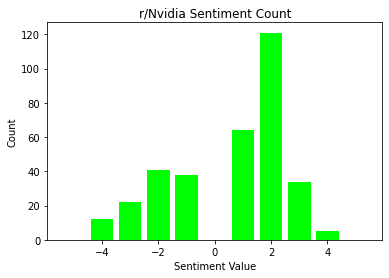

In [109]:
# Count vs Sentiment Value Plot
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Counts'], color='lime')  # add the y-values and color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Count')  # add y-label
plt.title('r/Nvidia Sentiment Count')  # add title
plt.show()


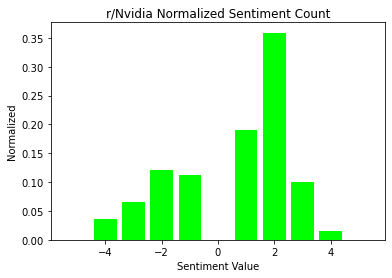

In [111]:
# Normalized Counts vs Sentiment Value Plot
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Normalized_Counts'], color='lime')  # add the y-values and color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Normalized')  # add y-label
plt.title('r/Nvidia Normalized Sentiment Count')  # add title
plt.show()

# Prompt
### In the cell below, enter a subreddit you which to compare the sentiment of the post comments, decide how far back to pull posts, and how many posts to pull comments from.

Pick a subreddit that can be compared with your first subreddit in terms of sentiment. You may want to go back up to the first subreddit section and change some parameters.  For example, do you want to find top posts, or hot posts? From what time period? How many posts?  If you change these settings above (the `number_of_posts` and `time_period` variables) you should re-run the notebook from the beginning.

The following code is the same as we did for our first subreddit, just condensed into one code cell.

In [100]:
subreddit_2 = reddit.subreddit('Amd').hot(limit=number_of_posts)


# Create an empty list to store the data
subreddit_comments_2 = []

# go through each post in our subreddit and put the comment body and id in our dictionary
for post in tqdm(subreddit_2, total=number_of_posts):
    submission = reddit.submission(id=post)
    submission.comments.replace_more(limit=0)  # This line of code expands the comments if “load more comments” and “continue this thread” links are encountered
    for top_level_comment in submission.comments: 
        subreddit_comments_2.append(top_level_comment.body)  # add the comment to our list of comments
        

# Store comments in a DataFrame using a dictionary as our input
# This sets the column name as the key of the dictionary, and the list of values as the values in the DataFrame
subreddit_comments_df_2 = pd.DataFrame(data={'comment': subreddit_comments_2})
    
# we create a dictionary for storing overall counts of sentiment values
sentiments_2 = {"-5": 0, "-4": 0, "-3": 0, "-2": 0, "-1": 0, "0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}

for comment in subreddit_comments_df_2['comment']:  # loop over each comment
        comment_words = comment.split()  # split comments into individual words
        for word in comment_words:  # loop over individual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            if word in scores.keys():  # check if word is in sentiment dictionary
                score = scores[word]  # check if word is in sentiment dictionary
                sentiments_2[str(score)] += 1  # add one to the sentiment score
                
# Now let us put the sentiment scores into a dataframe.
comment_sentiment_df_2 = pd.DataFrame(data={'Sentiment_Value': list(sentiments_2.keys()), 'Counts': list(sentiments_2.values())})
# the 'value' column is a string; convert to integer (numeric type)
comment_sentiment_df_2['Sentiment_Value'] = comment_sentiment_df_2['Sentiment_Value'].astype('int')

# We normalize the counts so we will be able to compare between two subreddits on the same plot easily
comment_sentiment_df_2['Normalized_Counts'] = comment_sentiment_df_2['Counts'] / comment_sentiment_df_2['Counts'].sum()  # Normalize the Count
comment_sentiment_df_2

,Sentiment_Value,Counts,Normalized_Counts
0,-5,3,0.000902
1,-4,86,0.025857
2,-3,199,0.059832
3,-2,579,0.174083
4,-1,497,0.149429
5,0,0,0.000000
6,1,490,0.147324
7,2,976,0.293446
8,3,444,0.133494
9,4,50,0.015033


# Prompt
## We will plot the data so it is easier to visualize.  
## In each of the three cells below, plot the Count, Normalized Count, and Normalized Score data vs Sentiment Value.  In each plot add the appropriate x-label, y-label, plot title , and color

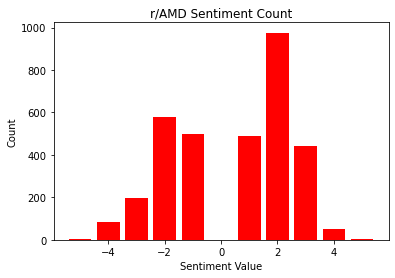

In [114]:
# Count vs Sentiment Value Plot
plt.bar(comment_sentiment_df_2['Sentiment_Value'], comment_sentiment_df_2['Counts'], color='red')  # add the y-values and color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Count')  # add y-label
plt.title('r/AMD Sentiment Count')  # add title
plt.show()

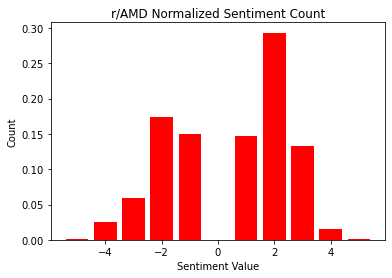

In [115]:
# Normalized Counts vs Sentiment Value Plot
plt.bar(comment_sentiment_df_2['Sentiment_Value'], comment_sentiment_df_2['Normalized_Counts'], color='red')  # add the y-values and color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Count')  # add y-label
plt.title('r/AMD Normalized Sentiment Count')  # add title
plt.show()

# Prompt
## Now we will overlay the baseline comment sentiment and the subreddit comment sentiment to help compare.

## In each of the three cells below, overlay the plots the Count, Normalized Count, and Normalized Score data vs Sentiment Value. In each plot add the appropriate x-label, y-label, plot title, and plot color

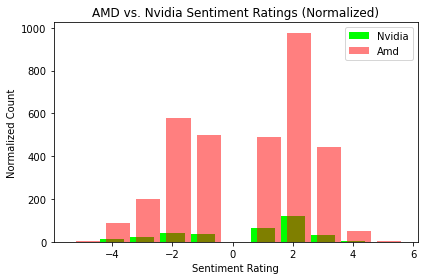

In [120]:
# Count vs Sentiment Value Plot
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Counts'], color='lime', label='Nvidia')  # add first subreddit data and color

# add second subreddit with a slight offset of x-axis; alpha is opacity/transparency
plt.bar(comment_sentiment_df_2['Sentiment_Value'] + 0.2, comment_sentiment_df_2['Counts'], color='red', label='Amd', alpha=0.5)  # add second subreddit and color
plt.legend()  # show the legend

plt.xlabel('Sentiment Rating')  # add x-label
plt.ylabel('Normalized Count')  # add y-label
plt.title('AMD vs. Nvidia Sentiment Ratings (Normalized)')  # add title
plt.tight_layout()  # tight_layout() automatically adjusts margins to make it look nice
plt.show()  # show the plot

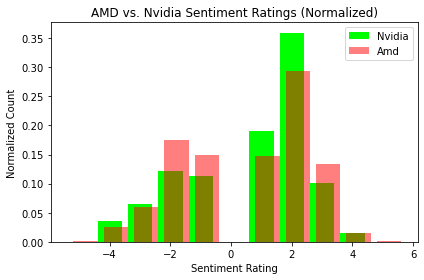

In [122]:
# Normalized Count vs Sentiment Value Plot
plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Normalized_Counts'], color='lime', label='Nvidia')  # add first subreddit data and color
ax = plt.gca()  # gets current axes of the plot for adding another dataset to the plot

# add second subreddit with a slight offset of x-axis
plt.bar(comment_sentiment_df_2['Sentiment_Value'] + 0.2, comment_sentiment_df_2['Normalized_Counts'], color='red', label='Amd', alpha=0.5)  # add second subreddit and color
plt.legend()  # show the legend

plt.xlabel('Sentiment Rating')  # add x-label
plt.ylabel('Normalized Count')  # add y-label
plt.title('AMD vs. Nvidia Sentiment Ratings (Normalized)')  # add title
plt.tight_layout()  # tight_layout() automatically adjusts margins to make it look nice
plt.show()  # show the plot

In [8]:
print('**In comparing the count graph and the normalized graphs, we see a larger standard count favoring AMD. This makes sense as its the larger subreddit and is thought to be the more enthusiast-minded computer componenets company. The normalized graph shows that there are more positive sentiment ratings, relative to negative sentiment ratings, on r/Nvidia over r/Amd. I chose this comparison as Nvidia came out with a large product unveil today, 9/1/2020, and suspected that the reaction would be positive. My suspicision held up in this analysis!**')

**In comparing the count graph and the normalized graphs, we see a larger standard count favoring AMD. This makes sense as its the larger subreddit and is thought to be the more enthusiast-minded computer componenets company. The normalized graph shows that there are more positive sentiment ratings, relative to negative sentiment ratings, on r/Nvidia over r/Amd. I chose this comparison as Nvidia came out with a large product unveil today, 9/1/2020, and suspected that the reaction would be positive. My suspicision held up in this analysis!**


# Stretch goal (bonus-ish)
### Although this is not formally a bonus for points, it is a learning opportinity.  You are not required to complete the following part of this notebook for the assignment.

Our sentiment analysis technique above works, but has some shortcomings.  The biggest shortcoming is that each word is treated individually.  But what if we have a sentence with a negation?  For example:

'This is not a bad thing.'

This sentence should be positive overall, but AFINN only has the word 'bad' in the dictionary, and so the sentence gets an overall negative score of -3.

The most accurate sentiment analysis methods use neural networks to capture context as well as semantics.  The drawback of NNs is they are computationally expensive to train and run.

An easier method is to use a slightly-improved sentiment analysis technique, such as TextBlob or VADER (https://github.com/cjhutto/vaderSentiment) in Python.  Both libraries use a hand-coded algorithm with word scores like AFINN, but also with additions like negation rules (e.g. a word after 'not' has it's score reversed).

Other sentiment analysis libraries in Python can be read about here: https://www.iflexion.com/blog/sentiment-analysis-python

### The stretch goal
The stretch goal is to use other sentiment analysis libraries on the Reddit data we collected, and compare the various approaches (AFINN word-by-word, TextBlob, and VADER) using plots and statistics.  For the AFINN word-by-word approach, you will need to either sum up the sentiment scores for each comment, or average them.  You might also divide them by 5 to get the values between -1 and +1.

Here is a brief example of getting scores from the 3 methods described above.  We can see while the raw AFINN approach gives a score of -0.6 (if normalized), TextBlob shows 0.35 and VADER shows 0.43.

In [ ]:
!conda install -c conda-forge textblob

In [ ]:
!pip install textblob vaderSentiment

In [ ]:
sentence = 'This is not a bad thing.'
[(word, scores[word]) for word in sentence.split() if word in scores]

In [ ]:
from textblob import TextBlob
tb = TextBlob(sentence)
print(tb.polarity)
print(tb.sentiment_assessments)

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(sentence)